# Titanic Data Cleaning Process:

In [275]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring basic info about Data

In [276]:
# read csv_file
titanic=pd.read_csv('Titanic-Dataset.csv')

In [277]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [278]:
titanic.shape

(891, 12)

In [279]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
# Checking for duplicate values
titanic.duplicated().sum()

np.int64(0)

In [281]:
# Checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [282]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [283]:
# Conveting Age column to Int64(used Int64 because it has null vlaues also)
titanic['Age']=np.floor(titanic['Age']).astype('Int64')

In [284]:
# Converting Fare float column to interger
titanic['Fare']=titanic['Fare'].astype('int64')

In [285]:
# Checking for datatypes for all coloumns
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             Int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

### Handling Missing/Duplicate Values

In [286]:
# Filling null vlaues of Age column with median
age_med=titanic['Age'].median()
titanic['Age']=titanic['Age'].fillna(age_med)

In [287]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [288]:
# getting basic info about categorical columns
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [289]:
titanic['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [290]:
# Filling null values of Cabin column with mode(as it is a categorical column)
cabin_mode=titanic['Cabin'].mode()[0][0:3]
titanic['Cabin']=titanic['Cabin'].fillna(cabin_mode)

In [291]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [292]:
# Checking unique values for Embarked column 
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [293]:
# Chekcing all null values for Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [294]:
# dropping all null values 
titanic.dropna(inplace=True)

In [295]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Encoding the Categorical features

In [296]:
# Encoding Categorical features into numerical values
lab_encode={}
cat_col=['Name','Sex','Cabin','Ticket','Embarked']
for col in cat_col:
    label=LabelEncoder()
    titanic[col]=label.fit_transform(titanic[col])
    lab_encode[col]=label


In [297]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22,1,0,522,7,46,2
1,2,1,1,190,0,38,1,0,595,71,81,0
2,3,1,3,353,0,26,0,0,668,7,46,2
3,4,1,1,272,0,35,1,0,48,53,55,2
4,5,0,3,15,1,35,0,0,471,8,46,2


### Standardizing the Data

In [298]:
# Standardizing all the numerical values 
scaler=StandardScaler()
standard=scaler.fit_transform(titanic)

### Outliers Detection and Removal

<Axes: >

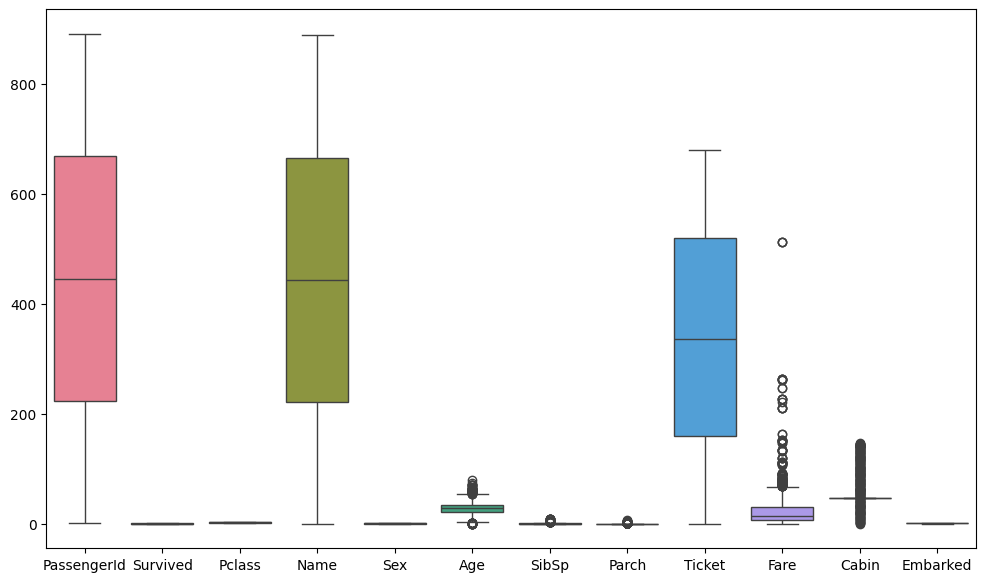

In [299]:
# Checking for outliers
plt.figure(figsize=(12,7))
sns.boxplot(data=titanic)

In [300]:
# calculating IQR along with checking bounds
Q1=titanic['Fare'].quantile(0.25)
Q3=titanic['Fare'].quantile(0.75)

IQR=Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

print(f'Lower Bound -->{lower_bound}')
print(f'Upper Bound--> {upper_bound}')

Lower Bound -->-29.0
Upper Bound--> 67.0


In [301]:
# removing outliers
titanic_cleaned=titanic[(titanic['Fare']>=lower_bound) & (titanic['Fare']<=upper_bound)]

In [302]:
# there is no need to remove outliers for Cabin and Age column as these have unique values 

<Axes: >

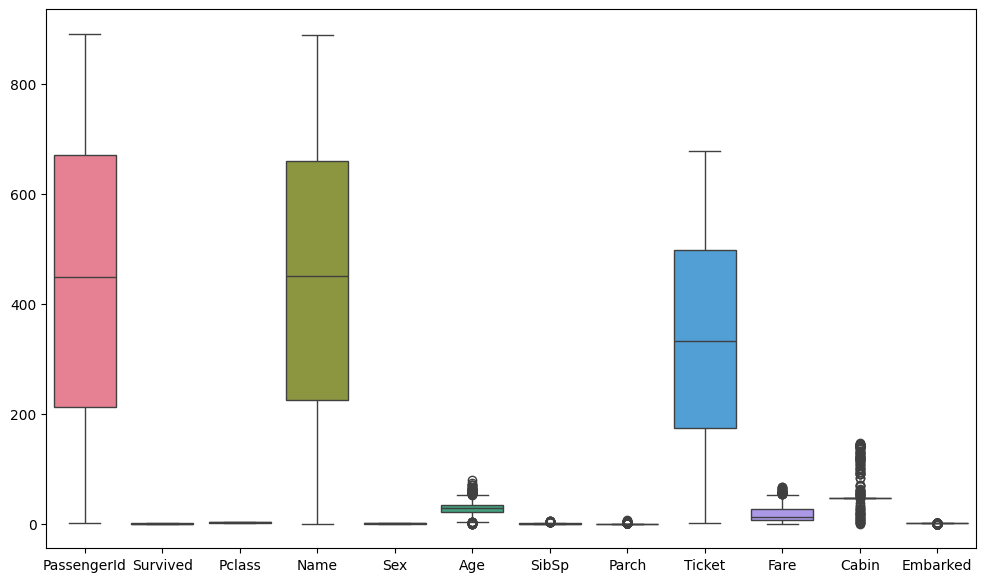

In [303]:
# Again identifying for outliers after removal process
plt.figure(figsize=(12,7))
sns.boxplot(data=titanic_cleaned)